In [ ]:
!gdown https://drive.google.com/uc?id=101sgazgxxT1bUDyTLVYlr3i1H2VCAd2m # Control
!gdown https://drive.google.com/uc?id=1D1XbF5SdQ8lJNb_IFyYbHMI5w7ukY8xs #W/ magnets

In [ ]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import blob_log, blob_dog, blob_doh
filname = '/content/20201029_163023_001.mp4'
vid = imageio.get_reader(filname, "mp4")
frames_stack = []
blobs = []
for frame in vid.iter_data():
  frame = frame[200:1020,:,0]
  frames_stack.append(frame)
  blob = np.array(blob_doh(frame, min_sigma= 10, max_sigma = 50, threshold = 0.01)).squeeze()
  blobs.append(blob) 
blobs = np.array(blobs)
frames_stack = np.array(frames_stack)
print (blobs.shape)
print (frames_stack.shape) 
plt.imshow(frames_stack[100,:,:])

In [ ]:
from scipy.optimize import curve_fit
x = []
y = []
frames = []
i = 0
for blob in blobs1:
  frames.append(i/240)
  i += 1
  x.append(blob[1])
  y.append(-blob[0] + 810)
x = np.array(x)
y = np.array(y)
plt.scatter(frames, x, label = 'data')
plt.xlabel("Time (s)")
plt.ylabel("X-position of the Pendulum (Pixels)")
plt.title("X-position of Pendulum over time)")
plt.legend(loc = 'upper right')
plt.show()
plt.scatter(frames, y, label = 'data')
plt.xlabel("Time (s)")
plt.ylabel("Y-position of Pendulum (Pixels)")
plt.title("Y-position of Pendulum over time")

(355, 200, 200)


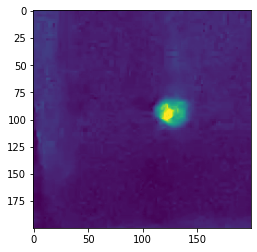

In [ ]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import blob_log, blob_dog, blob_doh
import cv2
filename = '/content/20201030_171546_002.mp4'
blob_stack = []
vid = imageio.get_reader(filename, "mp4")
frames_stack = []
blobs = []
i = 0
for frame in vid.iter_data():
  frame = frame[540:740,500:700,0]
  frames_stack.append(frame) 
  blob = np.array(blob_doh(frame, min_sigma= 10, max_sigma = 50, threshold = 0.01)).squeeze()
  blobs.append(blob) 
blobs = np.array(blobs) 
frames_stack = np.array(frames_stack) 
blob_stack.append(blobs)
print(frames_stack.shape)
plt.imshow(frames_stack[100,:,:,])

[ 1.66855730e+02  9.08191028e+00 -2.73411118e-01 -2.65732417e+00
  5.78520663e+02]


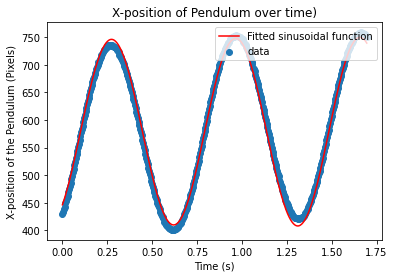

[ 25.23242987  -4.5091792  -17.98114801  -9.73527542  -3.2034943
 154.96008484]


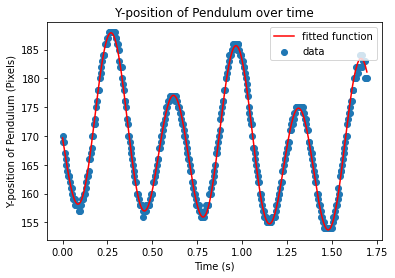

In [ ]:
from scipy.optimize import curve_fit
x = []
y = []
frames = []
i = 0
vid = 0
for blob in blobs:
  frames.append(i/240)
  i += 1
  x.append(blob[1])
  y.append(-blob[0] + 810)
x = np.array(x)
y = np.array(y)
def func(z, a, b, c, d, e):
  return (a - d*z) * np.cos(b*(z + c)) + e
if vid == 0:    
  popt, pcov = curve_fit(func, frames, x, p0 = [50, 6, 0.2, 10, 90])
elif vid == 1:
  popt, pcov = curve_fit(func, frames, x, p0 = [50, 6, 0.2, 10, 90])
print (popt)
plt.scatter(frames, x, label = 'data')
plt.plot(frames, [func(frame, a = popt[0], b = popt[1], c = popt[2], d = popt[3], e = popt[4]) for frame in frames], 'r', label = "Fitted sinusoidal function")
plt.xlabel("Time (s)")
plt.ylabel("X-position of the Pendulum (Pixels)")
plt.title("X-position of Pendulum over time)")
plt.legend(loc = 'upper right')
plt.show()
plt.scatter(frames, y, label = 'data')
plt.xlabel("Time (s)")
plt.ylabel("Y-position of Pendulum (Pixels)")
plt.title("Y-position of Pendulum over time")
if vid == 0:
  def func1(z, a, b, c, d, e, f):
    return a * (np.sin(2*b*z + c))**2 + d * (np.sin(b*z)) * (np.cos(b*z + c)) + e * z + f
  popt1, pcov1 = curve_fit(func1, frames, y, p0 = [-30, -5, -17, -9, -1.2, 168])
elif vid == 1:
  def func1(z, a, b, c, d, e, f):
    return a * np.sin(b*(z+c)) + d*(e**(-z)) + f
  popt1, pcov1 = curve_fit(func1, frames, y, p0 = [-6, 20, 0.5, 5, 2, 708])
plt.plot(frames, [func1(frame, a = popt1[0], b = popt1[1], c = popt1[2], d = popt1[3], e = popt1[4], f = popt1[5]) for frame in frames], 'r', label = 'fitted function')
print (popt1)
plt.legend(loc = 'upper right')
plt.show()